# **1. Datenbeschreibung:**

Ziel: Dokumentation, was die Daten enthalten und was jede Spalte/Variable bedeutet.

Struktur der Daten analysieren:

Verwendung von df.info() und df.describe(), um einen Überblick über die Spalten und ihre Typen zu erhalten.

Ergebnis:
Spaltennamen, Datentypen, Anzahl der Werte, Verteilung (Min, Max, Mean, Std).

In [1]:
# Libraries
# ==============================================================================
!pip install seaborn matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt


In [2]:
# Data Download
# ==============================================================================
df = pd.read_csv('/content/sample_data/sickness_table.csv')

print(df.head(),'\n')
print(df.info(),'\n')
print(round(df.describe()))

   Unnamed: 0        date  n_sick   calls  n_duty  n_sby  sby_need  dafted
0           0  2016-04-01      73  8154.0    1700     90       4.0     0.0
1           1  2016-04-02      64  8526.0    1700     90      70.0     0.0
2           2  2016-04-03      68  8088.0    1700     90       0.0     0.0
3           3  2016-04-04      71  7044.0    1700     90       0.0     0.0
4           4  2016-04-05      63  7236.0    1700     90       0.0     0.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   date        1152 non-null   object 
 2   n_sick      1152 non-null   int64  
 3   calls       1152 non-null   float64
 4   n_duty      1152 non-null   int64  
 5   n_sby       1152 non-null   int64  
 6   sby_need    1152 non-null   float64
 7   dafted      1152 non-null   float64
dtypes: float64(3), int64(4), ob

1.1 ) Daten werden als Data Frame behandelt.

1.2)  Spaltenbeschreibung:
- date = Datum
- calls = Notrufe
- n_sick = Anzahl der kranken Einsatzfahrer
- n_duty = Anzahl der fest eingeplanten Einsatzfahrer
- sby_need = Anzahl der aktivierten Standby-Einsatzfahrer
- n_sby = Anzahl der eingeplanten Standby-Fahrer
- drafted = Zusätzliche Standby-Fahrer, falls n_sby nicht ausreicht

1.3) Daten:

- Der Datentyp (Dtype) wurde als int64, object und float64 festgestellt.
- Insgesamt gibt es 8 Spalten und 1052 Zeilen.
- Es wurden keine NaN-Werte ermittelt.
- Es wurden keine Redundanzen festgestellt.

1.4) Datenbeschreibung:
- Unnamed: 0: Zählt die Gesamtanzahl der Datensätze (1152).
- n_sick: Anzahl der kranken Einsatzfahrer; Durchschnitt: 69, Maximalwert: 119.
- calls: Anzahl der Notrufe; Durchschnitt: 7920, Maximalwert: 11850.
- n_duty: Anzahl der fest eingeplanten Einsatzfahrer; Durchschnitt: 1821, Maximalwert: 1900.
- n_sby: Anzahl der eingeplanten Standby-Fahrer; konstant bei 90.
- sby_need: Anzahl der aktivierten Standby-Einsatzfahrer; Durchschnitt: 35, Maximalwert: 555.
- drafted: Zusätzliche Standby-Fahrer; Durchschnitt: 16, Maximalwert: 465.




# **2. Datenqualitätsanalyse:**

Ziel: Analyse der Datenqualität.

Fehlende Werte identifizieren:
df.isnull().sum()

Duplikate finden:
df.duplicated().sum()

Anomalien oder Ausreißer identifizieren:
Verwendung von df.describe() und boxplots, um Ausreißer zu erkennen.


In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
date,0
n_sick,0
calls,0
n_duty,0
n_sby,0
sby_need,0
dafted,0


In [4]:
df.duplicated().sum()

0

# **3. Visualisierung:**

Ziel: Visuelle Darstellungen der Daten, um Muster und Trends zu erkennen.

Schritte:
Histogramme für numerische Spalten:

df.hist(column='Spalte', bins=30)

Boxplots für Ausreißer:
sns.boxplot(x=df['Spalte'])

Scatter-Plots oder Line-Plots für Zeitreihen oder Zusammenhänge:
sns.scatterplot(x='Spalte1', y='Spalte2', data=df)



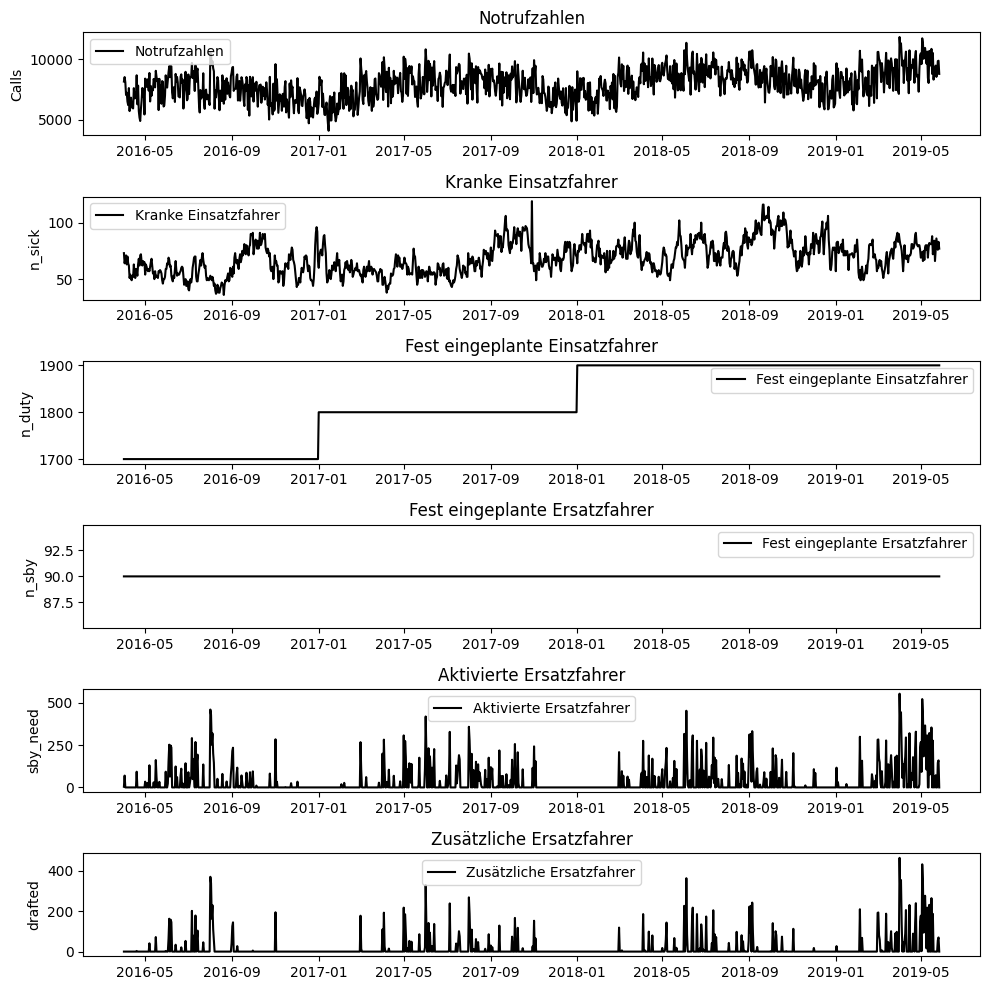

In [5]:
# Visualisierung der Features
# ==============================================================================
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(10,10))
plt.subplot(6,1,1)
plt.plot(df['date'], df['calls'], label='Notrufzahlen', color='black', )
plt.ylabel('Calls')
plt.title('Notrufzahlen')
plt.legend()

plt.subplot(6,1,2)
plt.plot(df['date'], df['n_sick'], label='Kranke Einsatzfahrer', color='black')
plt.ylabel('n_sick')
plt.title('Kranke Einsatzfahrer')
plt.legend()

plt.subplot(6,1,3)
plt.plot(df['date'], df['n_duty'], label= 'Fest eingeplante Einsatzfahrer',
         color='black')
plt.ylabel('n_duty')
plt.title('Fest eingeplante Einsatzfahrer')
plt.legend()

plt.subplot(6,1,4)
plt.plot(df['date'],df['n_sby'], label='Fest eingeplante Ersatzfahrer',
         color='black')
plt.ylabel('n_sby')
plt.title('Fest eingeplante Ersatzfahrer')
plt.legend()

plt.subplot(6,1,5)
plt.plot(df['date'], df['sby_need'], label='Aktivierte Ersatzfahrer',
         color='black')
plt.ylabel('sby_need')
plt.title('Aktivierte Ersatzfahrer')
plt.legend()

plt.subplot(6,1,6)
plt.plot(df['date'],df['dafted'], label='Zusätzliche Ersatzfahrer',
         color='black')
plt.ylabel('drafted')
plt.title('Zusätzliche Ersatzfahrer')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Bestimmung der Bins
# ==============================================================================
# Berechnung des Interquartilsabstands (IQR) für die Freedman-Diaconis Regel
Q1 = np.percentile(df['calls'], 25)
Q3 = np.percentile(df['calls'], 75)
IQR = Q3 - Q1

# Anzahl der Bins nach der Freedman-Diaconis Regel
n = len(df['calls'])
bin_width_fdr = 2 * IQR * n**(-1/3)
bins_fdr = int((df['calls'].max() - df['calls'].min()) / bin_width_fdr)

# Anzahl der Bins nach der Kaiser-Methode
bins_kaiser = int(np.sqrt(n))

# Ausgabe der Anzahl der Bins
print(f"Anzahl der Bins nach der Freedman-Diaconis Regel für Calls: {bins_fdr}")
print(f"Anzahl der Bins nach der Kaiser-Methode für Calls: {bins_kaiser}")

# Berechnung des Interquartilsabstands (IQR) für die Freedman-Diaconis Regel
Q1 = np.percentile(df['n_sick'], 25)
Q3 = np.percentile(df['n_sick'], 75)
IQR = Q3 - Q1

# Anzahl der Bins nach der Freedman-Diaconis Regel
n = len(df['n_sick'])
bin_width_fdr = 2 * IQR * n**(-1/3)
bins_fdr = int((df['n_sick'].max() - df['n_sick'].min()) / bin_width_fdr)

# Anzahl der Bins nach der Kaiser-Methode
bins_kaiser = int(np.sqrt(n))

# Ausgabe der Anzahl der Bins
print(f"Anzahl der Bins nach der Freedman-Diaconis Regel für n_sick: {bins_fdr}")
print(f"Anzahl der Bins nach der Kaiser-Methode für n_sick: {bins_kaiser}")


# Berechnung des Interquartilsabstands (IQR) für die Freedman-Diaconis Regel
Q1 = np.percentile(df['sby_need'], 25)
Q3 = np.percentile(df['sby_need'], 75)
IQR = Q3 - Q1

# Anzahl der Bins nach der Freedman-Diaconis Regel
n = len(df['sby_need'])
bin_width_fdr = 2 * IQR * n**(-1/3)
bins_fdr = int((df['sby_need'].max() - df['sby_need'].min()) / bin_width_fdr)

# Anzahl der Bins nach der Kaiser-Methode
bins_kaiser = math.ceil(1 + np.log2(n))

# Ausgabe der Anzahl der Bins
print(f"Anzahl der Bins nach der Freedman-Diaconis Regel für sby_need: {bins_fdr}")
print(f"Anzahl der Bins nach der Kaiser-Methode für sby_need: {bins_kaiser}")





Anzahl der Bins nach der Freedman-Diaconis Regel für Calls: 22
Anzahl der Bins nach der Kaiser-Methode für Calls: 33
Anzahl der Bins nach der Freedman-Diaconis Regel für n_sick: 21
Anzahl der Bins nach der Kaiser-Methode für n_sick: 33
Anzahl der Bins nach der Freedman-Diaconis Regel für sby_need: 237
Anzahl der Bins nach der Kaiser-Methode für sby_need: 12


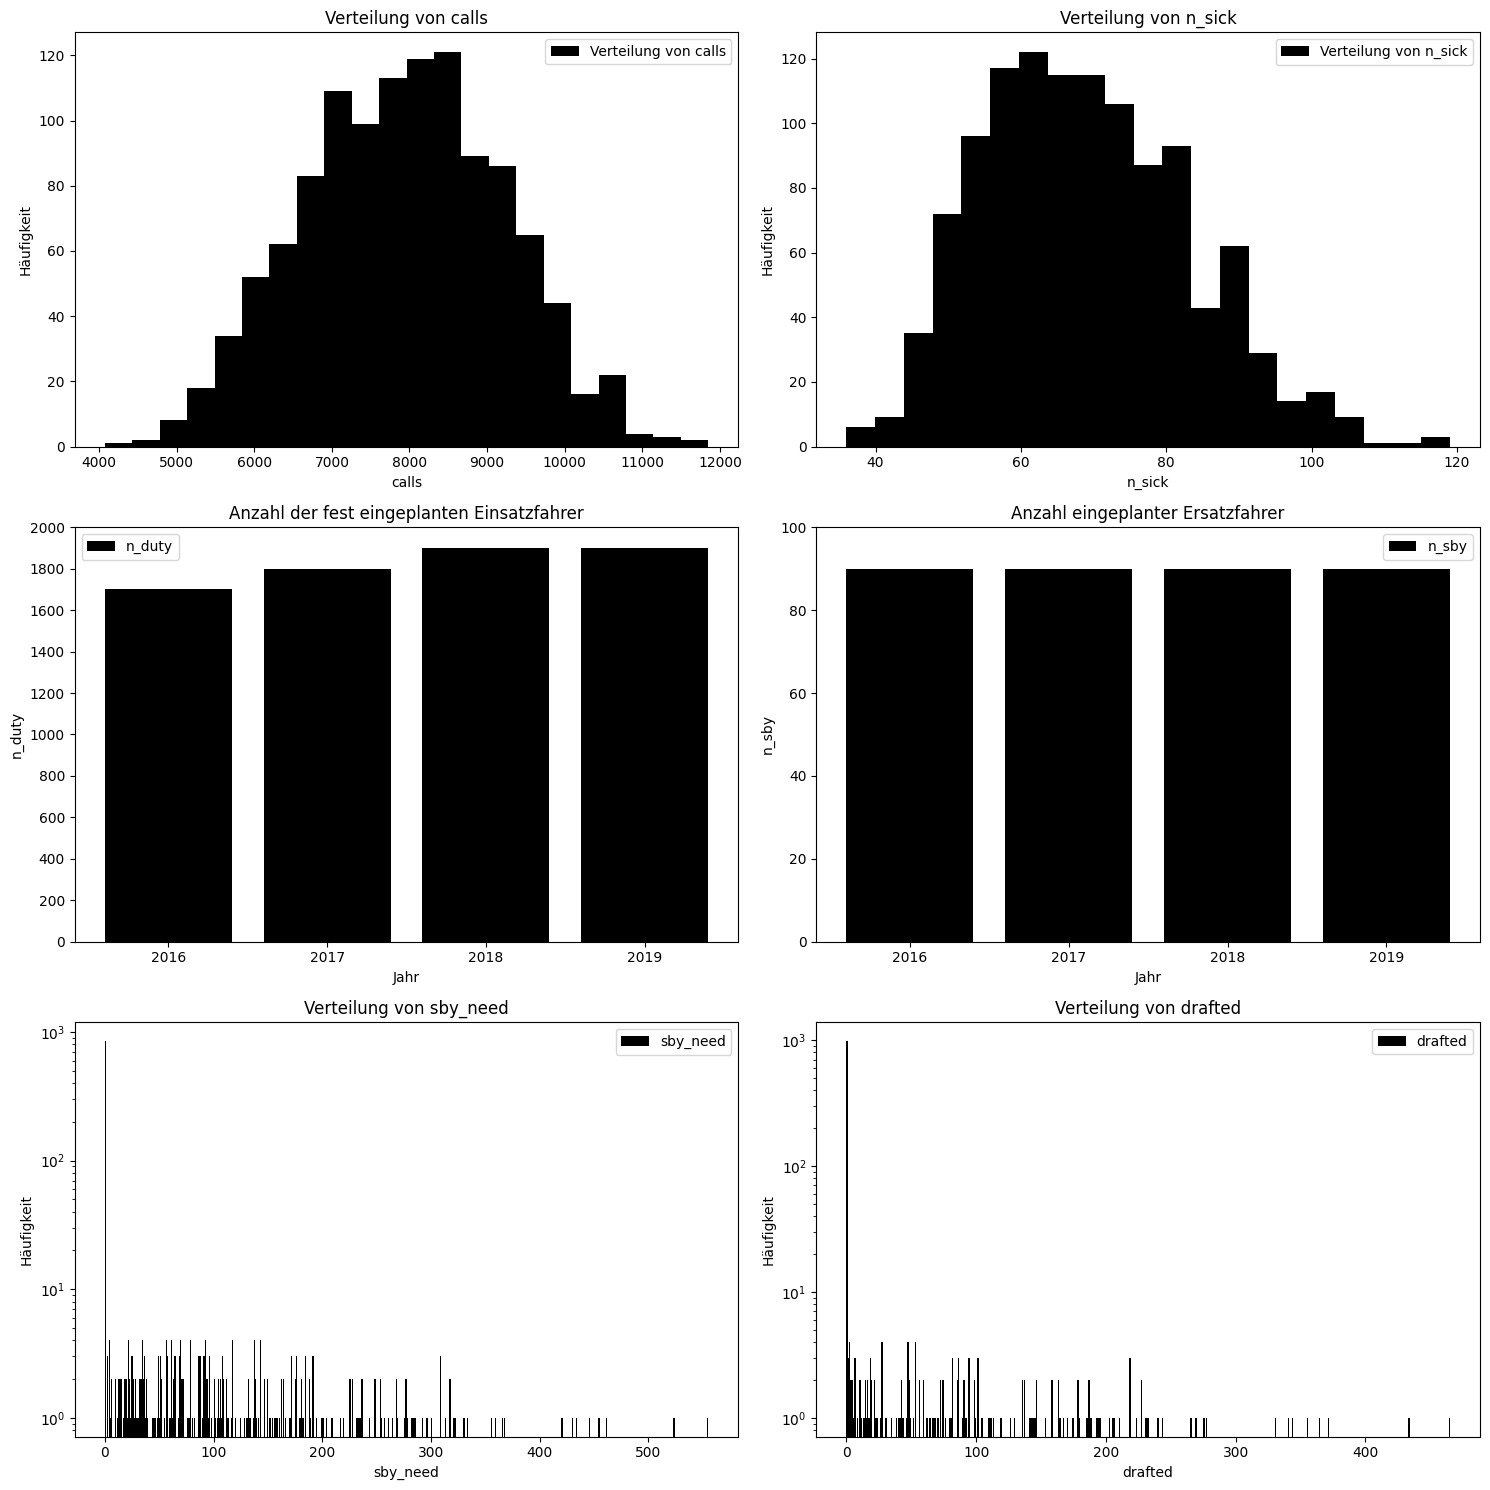

In [7]:

# Erstellung der Histogramme und der Balkendiagramme
# ==============================================================================

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.hist(df['calls'], label= 'Verteilung von calls', bins=22, color='black')
plt.ylabel('Häufigkeit')
plt.xlabel('calls')
plt.title('Verteilung von calls')
plt.legend()

plt.subplot(3,2,2)
plt.hist(df['n_sick'], label = 'Verteilung von n_sick', bins= 21, color='black')
plt.ylabel('Häufigkeit')
plt.xlabel('n_sick')
plt.title('Verteilung von n_sick')
plt.legend()

plt.subplot(3,2,3)
df['year'] = df['date'].dt.year
annual_avg = df.groupby('year')['n_duty'].mean().reset_index()
plt.subplot(3, 2, 3)
plt.bar(annual_avg['year'], height=annual_avg['n_duty'], width=0.8,
        label='n_duty', color='black')
plt.xlabel('Jahr')
plt.xticks(annual_avg['year'])
plt.ylabel('n_duty')
plt.ylim(0, 2000)
plt.yticks(range(0, 2001, 200))
plt.title('Anzahl der fest eingeplanten Einsatzfahrer')
plt.legend()

plt.subplot(3,2,4)
annual_n_sby = df.groupby('year')['n_sby'].mean().reset_index()
plt.bar(annual_n_sby['year'], height=annual_n_sby['n_sby'], width=0.8,
        label='n_sby', color='black')
plt.xlabel('Jahr')
plt.xticks(annual_avg['year'])
plt.ylabel('n_sby')
plt.ylim(0, 100)
plt.title('Anzahl eingeplanter Ersatzfahrer')
plt.legend()

plt.subplot(3,2,5)
plt.hist(df['sby_need'], label= 'sby_need', bins = 555, color='black')
plt.xlabel('sby_need')
plt.ylabel('Häufigkeit')
plt.yscale('log')
plt.title('Verteilung von sby_need')
plt.legend()

plt.subplot(3,2,6)
plt.hist(df['dafted'], label= 'drafted', bins = 465, color='black')
plt.xlabel('drafted')
plt.ylabel('Häufigkeit')
plt.yscale('log')
plt.title('Verteilung von drafted')
plt.legend()
plt.tight_layout()
plt.show()

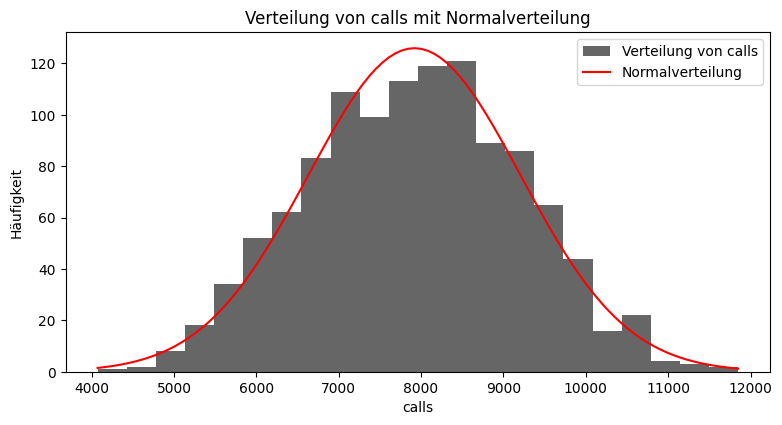

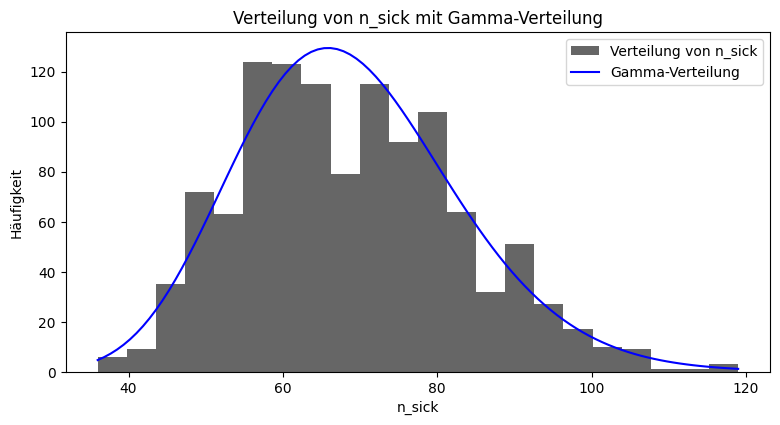

In [8]:
# Erstellung der Histogramme mit Normalverteilung und Gamma-Verteilung
# ==============================================================================

#Normalverteilung:
mean = df['calls'].mean()
std = df['calls'].std()
x = np.linspace(df['calls'].min(), df['calls'].max(), 100)
normal_distribution = (
    norm.pdf(x, mean, std) * len(df['calls']) * (df['calls'].
    max() - df['calls'].min()) / 22
)

plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 1)
plt.hist(df['calls'], bins=22, color='black', label='Verteilung von calls',
         alpha=0.6)
plt.plot(x, normal_distribution, color='red', label='Normalverteilung')
plt.xlabel('calls')
plt.ylabel('Häufigkeit')
plt.title('Verteilung von calls mit Normalverteilung')
plt.legend()
plt.show()



# Gamma-Verteilung:
mean = df['n_sick'].mean()
std = df['n_sick'].std()
shape = (mean / std) ** 2   # Shape-Parameter (k)
scale = std ** 2 / mean     # Scale-Parameter (theta)
x = np.linspace(df['n_sick'].min(), df['n_sick'].max(), 100)
gamma_distribution =(
    gamma.pdf(x, a=shape, scale=scale) * len(df['n_sick'])
    *(df['n_sick'].max() - df['n_sick'].min()) / 21
)

plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 1)
plt.hist(df['n_sick'], bins=22, color='black', label='Verteilung von n_sick',
         alpha=0.6)
plt.plot(x, gamma_distribution, color='blue', label='Gamma-Verteilung')
plt.xlabel('n_sick')
plt.ylabel('Häufigkeit')
plt.title('Verteilung von n_sick mit Gamma-Verteilung')
plt.legend()
plt.show()



Erstes Fazit:
- dafted kann ggf. gelöscht werden
- Unnamed: 0 kann gelöscht werden
- Calls ist ggf. ein guter Kanditat für die Zeitreihenanalyse
- n_sick ist ggf. ein guter Kanditat für die Zeitreihenanalyse

# **4. Explorative Datenanalyse (EDA):**

Ziel: Tiefergehende Analyse der Daten, um Zusammenhänge und interessante Muster zu finden.

Schritte:
Korrelation zwischen Variablen analysieren:

df.corr()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Verteilung der Daten analysieren:
Pairplots, um die Verteilung und die Beziehungen zwischen verschiedenen Variablen darzustellen.
sns.pairplot(df[['Spalte1', 'Spalte2', 'Spalte3']])

Wichtige Variablen identifizieren.


In [9]:
# df Anpassung:
# ==============================================================================
df = df.drop(columns=['Unnamed: 0', 'dafted'])
df['calls'] = df['calls'].astype('int64')
df['n_sick'] = df['n_sick'].astype('int64')
df['sby_need'] = df['sby_need'].astype('int64')
df['year'] = df['year'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1152 non-null   datetime64[ns]
 1   n_sick    1152 non-null   int64         
 2   calls     1152 non-null   int64         
 3   n_duty    1152 non-null   int64         
 4   n_sby     1152 non-null   int64         
 5   sby_need  1152 non-null   int64         
 6   year      1152 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 63.1 KB


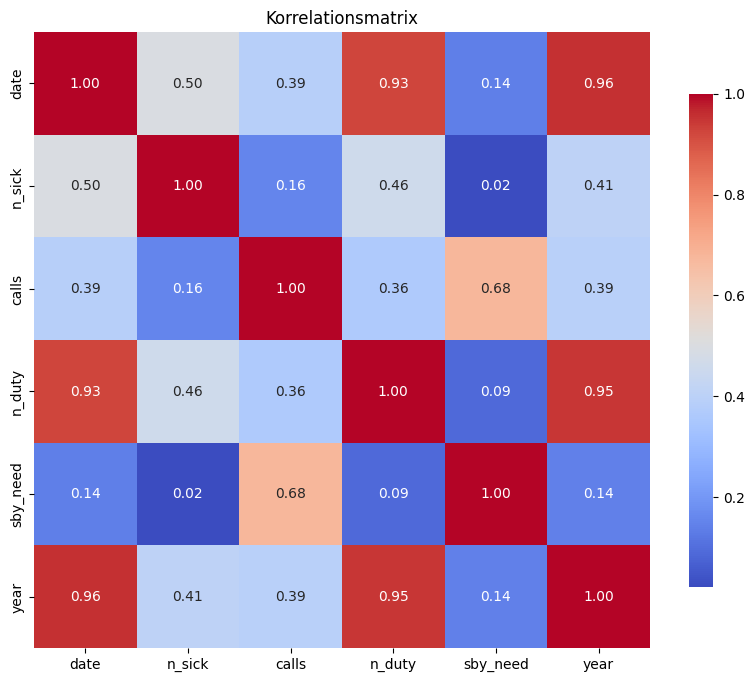

In [10]:
# Korrelationsmatrix:
# ==============================================================================

df_corr = df.drop(columns=['n_sby'])
correlation_matrix = df_corr.corr()

plt.figure(figsize =(10,8))
sns.heatmap(correlation_matrix, annot = True, fmt='.2f', cmap = 'coolwarm', square = True, cbar_kws={'shrink': .8})
plt.title('Korrelationsmatrix')
plt.show()



**Zielvariable ist sby_need:**

**calls hat eine Korrelation zu:**
- sby_need
- Zeit / Jahreszeiten
- n_duty
- n_sick (wenig)

**n_sick hat eine Korrelation zu:**
- n_duty
- Zeit / Jahreszeit

<Figure size 700x700 with 0 Axes>

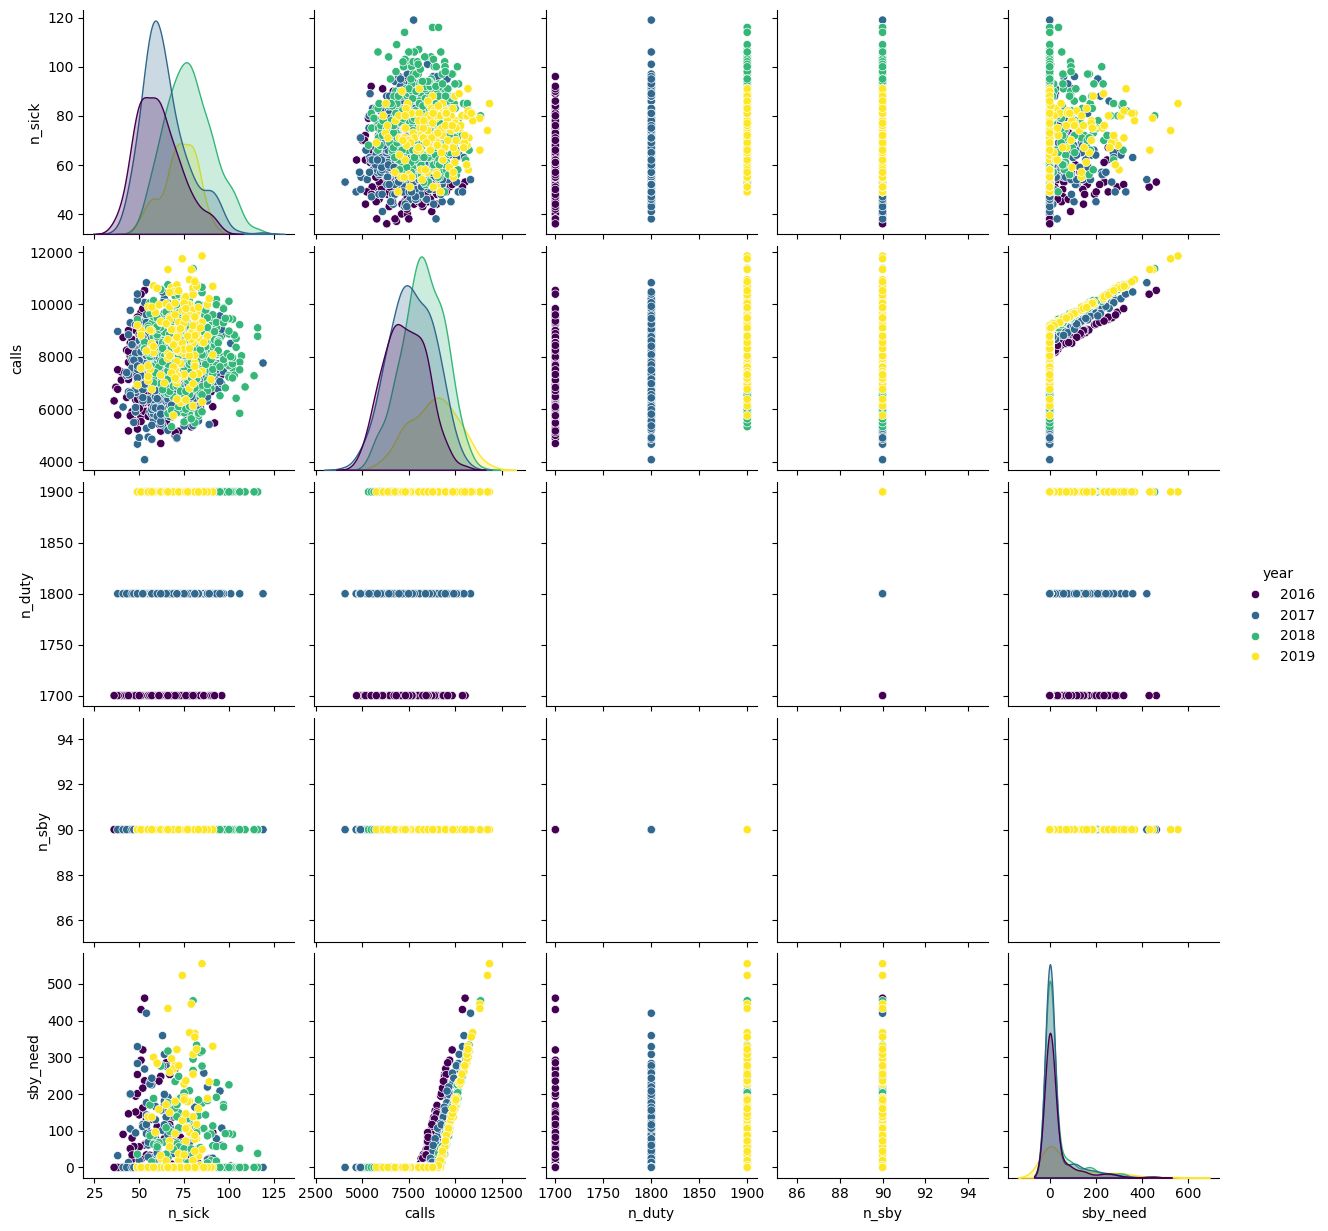

In [11]:
# Pairplot
# ==============================================================================
plt.figure(figsize=(7,7))
sns.pairplot(df, hue='year', palette='viridis')

plt.show()

**Weitere Erkenntnisse:**
- starke lineare Korrelation zwischen calls und sby_need
- n_duty als Kategorie 1700,1800,1900 fest eingeplante Einsatzfahrer. (Ggf. Einfluss auf lineare Regression)
- n_sick beeinflusst n_duty (Kranke Einsatzfahrer fehlen in der Planung)

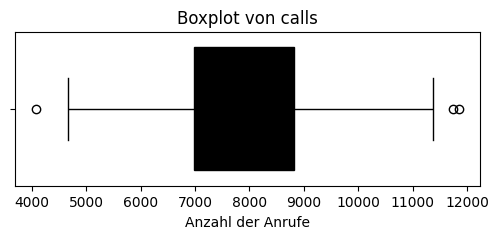

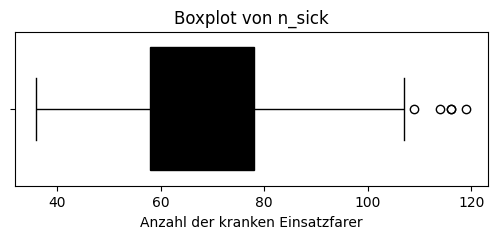

In [12]:
# Boxplots:
# ==============================================================================

plt.figure(figsize=(6,2))
sns.boxplot(x=df['calls'], color ='black')
plt.title('Boxplot von calls')
plt.xlabel('Anzahl der Anrufe')
plt.show()
print('\n')

plt.figure(figsize=(6.1,2))
sns.boxplot(x=df['n_sick'], color = 'black')
plt.title('Boxplot von n_sick')
plt.xlabel('Anzahl der kranken Einsatzfarer')
plt.show()



- Boxplot von calls: Deutet auf wenige Ausreißer in calls hin
- Boxplot von n_sick: Deutet auf wenige Ausreißer in n_sick hin

# **Fazit:**

- Zielvariable ist sby_need
- Zeitreihenanalyse mit calls und n_sick
- Lineare Regression, um sby_need zu schätzen
- Wenige Ausreißer

Die EDA ist hier noch nicht beendet. Das bedeutet, dass bei der Erstellung der Modelle noch weitere EDA erforderlich ist. Diese EDA dient dem ersten Eindruck auf die Daten.